ASSIGNEMENT 9

In [1]:
import numpy as np # for getting our distribution
import pandas as pd # to handle data frames
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from scipy import stats # to compute statistics
from scipy.cluster.hierarchy import dendrogram, linkage # to run the linkage method and create dendrograms
from sklearn.cluster import AgglomerativeClustering # to perform agglomerative clustering
from sklearn.preprocessing import StandardScaler

In [16]:
# Load the dataset
df_EFI = pd.read_csv('EFIplus_medit.csv', delimiter=";")
# Remove rows with NaN values 
df_EFI=df_EFI.dropna()


# Select the continuous environmental variables
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']



/var/folders/r6/jb2v8qyx3kl3xmghd7k9_zcc0000gn/T/ipykernel_19791/1745087042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  douro_tejo_sites['Cluster_' + method] = clustering.fit_predict(X_scaled)
/var/folders/r6/jb2v8qyx3kl3xmghd7k9_zcc0000gn/T/ipykernel_19791/1745087042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  douro_tejo_sites['Cluster_' + method] = clustering.fit_predict(X_scaled)
/var/folders/r6/jb2v8qyx3kl3xmghd7k9_zcc0000gn/T/ipykernel_19791/1745087042.py:22: SettingWithCopyWarning: 


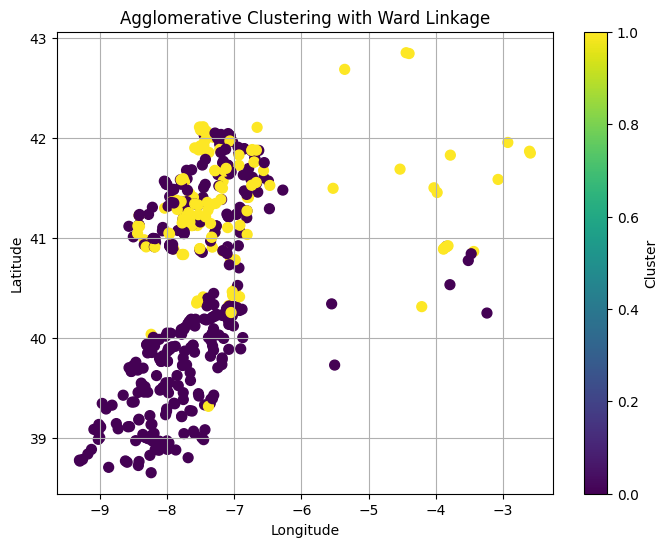

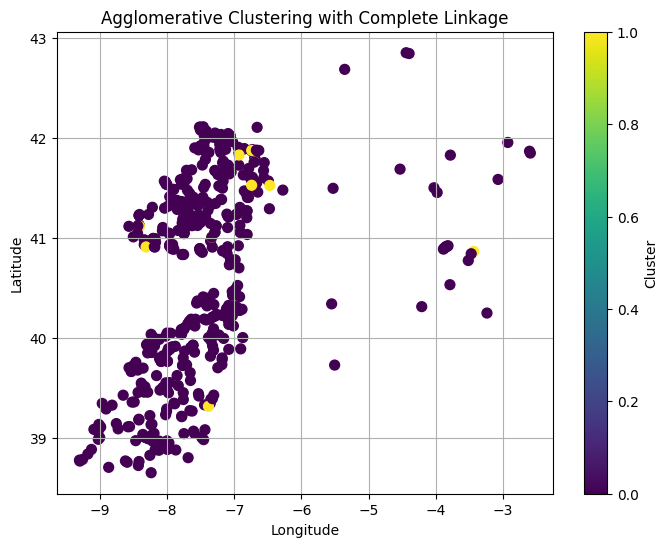

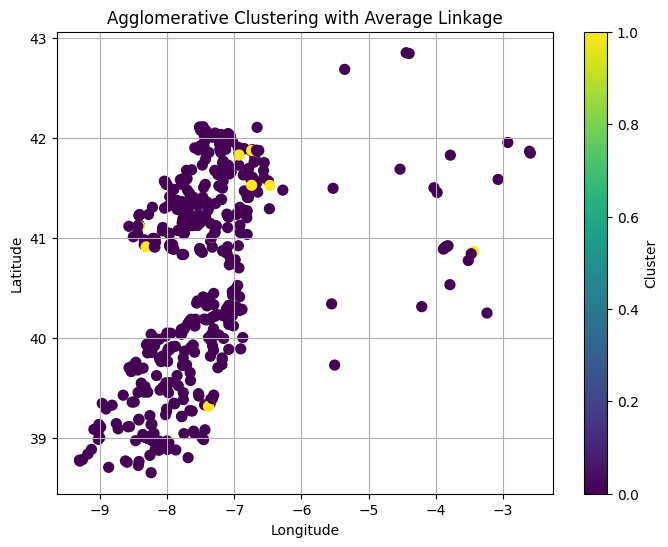

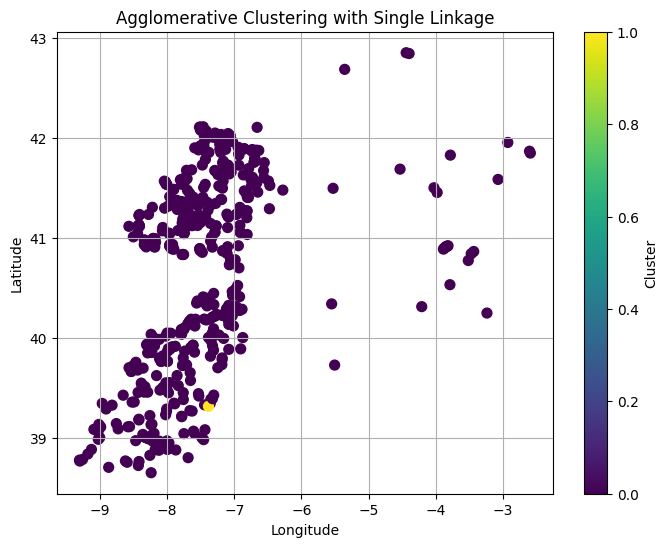

In [18]:
# Select sites from the Douro and Tejo basins
# Display the first few rows of the DataFrame
# Set the index of the DataFrame to 'Catchment_name'

douro_tejo_sites = df_EFI[df_EFI['Catchment_name'].isin(['Douro', 'Tejo'])]

douro_tejo_sites.set_index('Catchment_name', inplace=True)

# Select the quantitative environmental variables
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
X = douro_tejo_sites.loc[['Douro', 'Tejo'], continuous_vars]


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform agglomerative clustering with different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
for method in linkage_methods:
    clustering = AgglomerativeClustering(n_clusters=2, linkage=method)
    douro_tejo_sites['Cluster_' + method] = clustering.fit_predict(X_scaled)

# Visualize the clustering results for each linkage method
for method in linkage_methods:
    plt.figure(figsize=(8, 6))
    plt.scatter(douro_tejo_sites['Longitude'], douro_tejo_sites['Latitude'], c=douro_tejo_sites['Cluster_' + method], cmap='viridis', s=50)
    plt.title('Agglomerative Clustering with ' + method.capitalize() + ' Linkage')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show()

Question 2

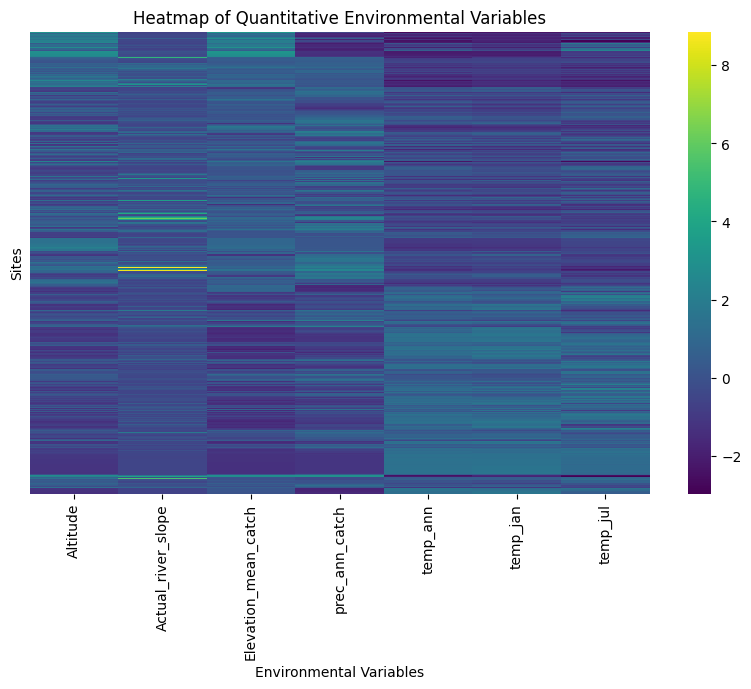

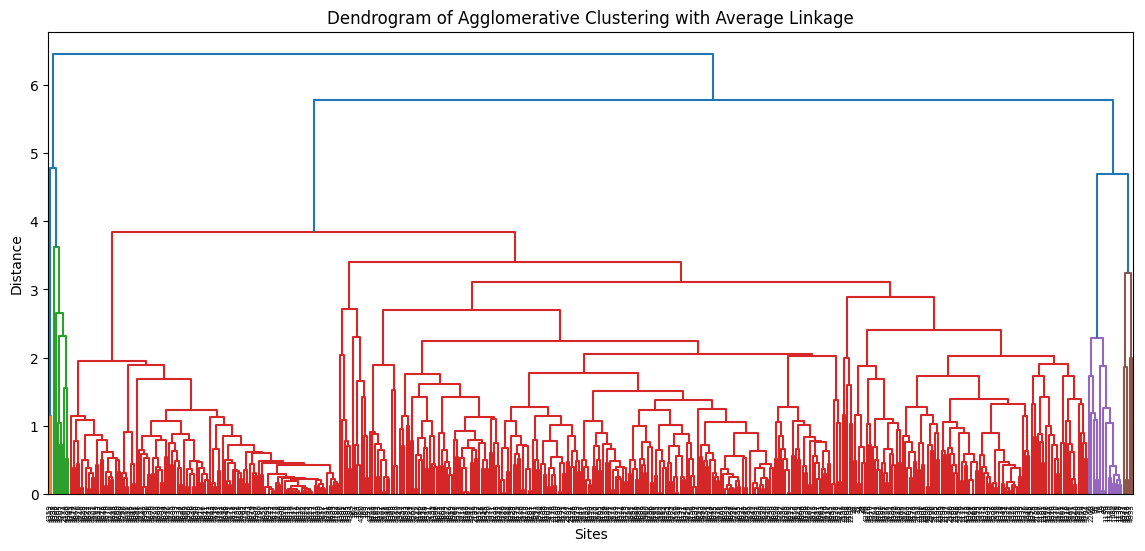

In [24]:
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate the linkage matrix using average linkage
linkage_matrix = linkage(X_scaled, method='average')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X_scaled, cmap='viridis', xticklabels=continuous_vars, yticklabels=False)
plt.title('Heatmap of Quantitative Environmental Variables')
plt.xlabel('Environmental Variables')
plt.ylabel('Sites')
plt.show()

# Plot the dendrogram
plt.figure(figsize=(14, 6))
dendrogram(linkage_matrix, labels=douro_tejo_sites.index, leaf_rotation=90)
plt.title('Dendrogram of Agglomerative Clustering with Average Linkage')
plt.xlabel('Sites')
plt.ylabel('Distance')
plt.show()
